In [3]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter, FuncFormatter

In [4]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2-250w.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchQuery/{algo}/{dataset[:-5]}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

### Prepare Dataset

In [5]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

---
### Plot Variation

In [37]:
def plot_multi_tfs_sum(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2-250w_10_.pcap'], window_size=200, fs=[28,20], lw=2, output='Thesis'):
    
    linestyles = ["-", "--", "-."]
    labels = []
    res = []
    # sum
    max_val = -1
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        max_val = max(max_val, result[-1])
        res.append(result)
        if d.split("_")[1] == "10":
            labels.append(d[:-9])
        else:
            labels.append(f'{d.split("_")[0]} \u2192 {d.split("_")[2]}')
       
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        if "\u2192" not in labels[i]:
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle='-')
        elif labels[i].split(' \u2192 ')[0].split('-')[1] == labels[i].split(' \u2192 ')[1].split('-')[1]:
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle='-')
        else:
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle=linestyles[i%3])

    # Custom function to format the y-axis
    def scientific_format(x, pos):
        return f'{x / 1e6:.1f}'
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-4, 4))  # Set the limits for using scientific notation
    
    ax = plt.gca()
    
    # Set the formatter for the y-axis ticks
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_format))
    ax.annotate(r'$\times 10^6$', xy=(0, 1), xycoords='axes fraction', fontsize=12,
            xytext=(10, 5), textcoords='offset points', ha='center')
    ax.spines[['top', 'right']].set_visible(False)
    
    # Add labels and legend
    plt.xlabel('Time (sec)', fontsize=fs[0])
    plt.ylabel(f'$L$', fontsize=fs[0])
    # plt.title('TFS Cumulative Count', fontsize=20)
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    # plt.ylim(top=max_val*1.2)
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks, size=fs[0])
    plt.yticks(size=fs[0])
    plt.xlim(-1, 51)
    plt.legend(ncol=1, fontsize=fs[1], handlelength=0.8,borderpad=0.15)
    plt.tight_layout()
    plt.grid()
    
    if output != "":
        plt.savefig(f'../../{output}/CD-TFS/tfs_{datasets[0].split("-")[0]}.pdf')

    # Show the plot
    plt.show()
    

In [38]:
def plot_multi_tfs_var(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2-250w_10_.pcap'], window_size=200, fs=[28,22], lw=2, output='Thesis'):
    
    linestyles = ["-", "--", "-."]
    labels = []

    res = []
    max_val = -1
    # sum
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        fin_res_var = [None]
        for i in range(1, len(result)):
            fin_res_var.append(result[i] - result[i-1])
            
        max_val = max(max_val, max(fin_res_var[1:]))
            
        res.append(fin_res_var)
        if d.split("_")[1] == "10":
            labels.append(d[:-9])
        else:
            labels.append(f'{d.split("_")[0]} \u2192 {d.split("_")[2]}')
    
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        if "\u2192" not in labels[i]:
            # plt.plot(res[i], label=labels[i], linewidth=2)
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle='-')
        elif labels[i].split(' \u2192 ')[0].split('-')[1] == labels[i].split(' \u2192 ')[1].split('-')[1]:
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle='-')
        else:
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle=linestyles[i%3])
        # plt.plot(res[i], label=labels[i], linewidth=2)
 
    # Set up ScalarFormatter
    # Custom function to format the y-axis
    def scientific_format(x, pos):
        return f'{x / 1e4:.1f}'
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-4, 4))  # Set the limits for using scientific notation
    
    ax = plt.gca()
    
    # Set the formatter for the y-axis ticks
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_format))
    ax.annotate(r'$\times 10^4$', xy=(0, 1), xycoords='axes fraction', fontsize=12,
            xytext=(10, 5), textcoords='offset points', ha='center')
    ax.spines[['top', 'right']].set_visible(False)

    # Add labels and legend
    plt.xlabel('Time (sec)', fontsize=fs[0])
    plt.ylabel('\u03BB', fontsize=fs[0])
    # plt.title('TFS DIfference', fontsize=20)
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks, size=fs[0])
    plt.xlim(-1, 51)
    plt.yticks(size=fs[0])
    # plt.ylim(top=max_val*1.3)
    # plt.legend(ncol=4, fontsize=16)
    plt.legend(ncol=1, fontsize=fs[1], handlelength=0.8,borderpad=0.15)
    plt.tight_layout()
    plt.grid()
    
    # # Place the legend outside the plot
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=16)

    # # Adjust layout to make room for the legend
    # plt.tight_layout(rect=[0, 0, 1, 1])
    if output != "":
        plt.savefig(f'../../{output}/CD-TFS/tfs_{datasets[0].split("-")[0]}\'.pdf')
    # Show the plot
    plt.show()
    

In [39]:
def plot_multi_tfs_sec_var(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2-250w_10_.pcap'], window_size=200, fs= [28,22], lw=2, output='Thesis'):
    
    linestyles = ["-", "--", "-."]
    labels = []

    res = []
    max_val = -1
    # sum
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        # variation
        fin_res_var = [None]
        for i in range(1, len(result)):
            fin_res_var.append(result[i] - result[i-1])
            
        # second variation
        fin_sec_res_var = [None, None]
        for i in range(2, len(result)):
            fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
            
        res.append(fin_sec_res_var)
        
        max_val = max(max_val, max(fin_sec_res_var[2:]))
        
        if d.split("_")[1] == "10":
            labels.append(d[:-9])
        else:
            labels.append(f'{d.split("_")[0]} \u2192 {d.split("_")[2]}')
    

    plt.figure(figsize=(12, 4))
    
    max_val = -1
    for i in range(len(res)):
        max_val = max(max_val, max([r if r != None else 0 for r in res[i]]))
        if "\u2192" not in labels[i]:
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle='-')
        elif labels[i].split(' \u2192 ')[0].split('-')[1] == labels[i].split(' \u2192 ')[1].split('-')[1]:
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle='-')
        else:
            plt.plot(res[i], label=labels[i], linewidth=lw, linestyle=linestyles[i%3])
            

    ax = plt.gca()
    tick_step = 10000
    y_max = ax.get_ylim()[1]
    # Generate new y-ticks based on the maximum y value
    new_yticks = np.arange(0, y_max + tick_step, tick_step)
    ax.set_yticks(new_yticks)
    ax.set_yticklabels([f'{int(tick/tick_step)}.0' for tick in new_yticks])
    # Annotate the y-axis with the scientific notation multiplier
    ax.annotate(r'$\times 10^4$', xy=(0, 1), xycoords='axes fraction', fontsize=12,
                xytext=(10, 5), textcoords='offset points', ha='center')
    ax.spines[['top', 'right']].set_visible(False)
        
    # Add labels and legend
    plt.xlabel('Time (sec)', fontsize=fs[0])
    plt.ylabel('\u0394\u03BB', fontsize=fs[0])
    # plt.title('TFS Second Difference', fontsize=20)
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks, size=fs[0])
    plt.yticks(size=fs[0])
    plt.xlim(-1, 51)
    # plt.ylim(top=max_val*1.2)
    plt.legend(ncol=1, fontsize=fs[1], handlelength=0.8,borderpad=0.15)
    plt.tight_layout()
    plt.grid()

    if output != "":
        plt.savefig(f'../../{output}/CD-TFS/tfs_{datasets[0].split("-")[0]}\'\'.pdf')
    # Show the plot
    plt.show()
    

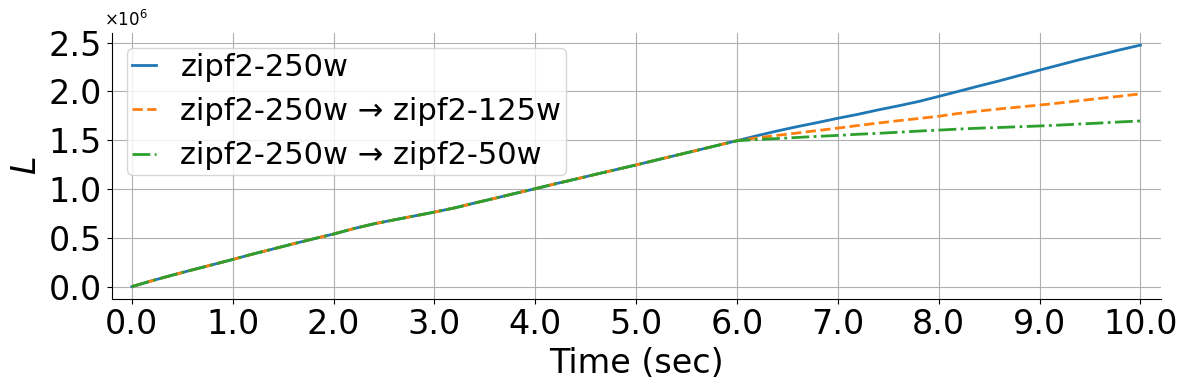

In [36]:
## TFS
# slides
# plot_multi_tfs_sum(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[32,20], lw=3, output='')

# # conference
# plot_multi_tfs_sum(datasets=pcap_file[1:2] + pcap_file[80:82], fs=[24,22],output='Conference')
# plot_multi_tfs_sum(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[24,22],output='Conference')
# plot_multi_tfs_sum(datasets=pcap_file[7:8] + pcap_file[94:96], fs=[24,22],output='Conference')

# thesis
plot_multi_tfs_sum(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[24,22],output='Thesis')


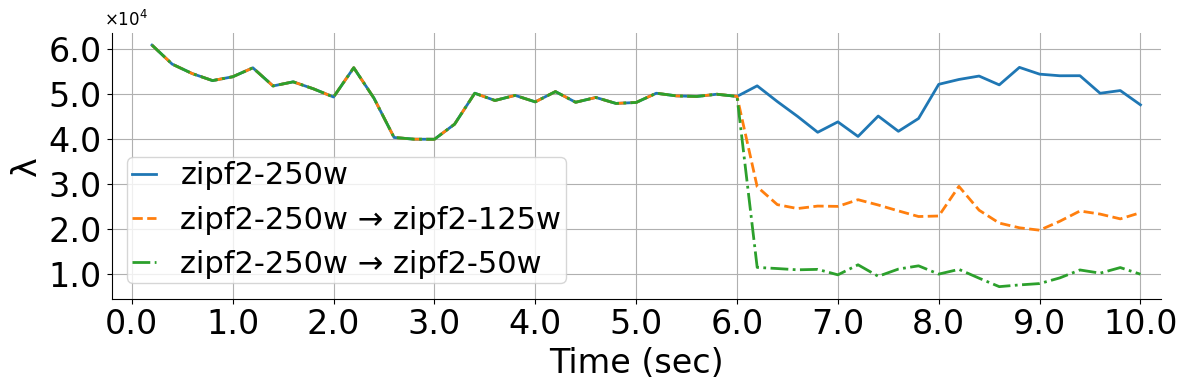

In [40]:
## TFS'
# # slide
# plot_multi_tfs_var(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[32,22], lw=3, output='')

# # conference
# plot_multi_tfs_var(datasets=pcap_file[1:2] + pcap_file[80:82], fs=[24,22],output='Conference')
# plot_multi_tfs_var(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[24,22],output='Conference')
# plot_multi_tfs_var(datasets=pcap_file[7:8] + pcap_file[94:96], fs=[24,22],output='Conference')

# Thesis
plot_multi_tfs_var(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[24,22],output='Thesis')



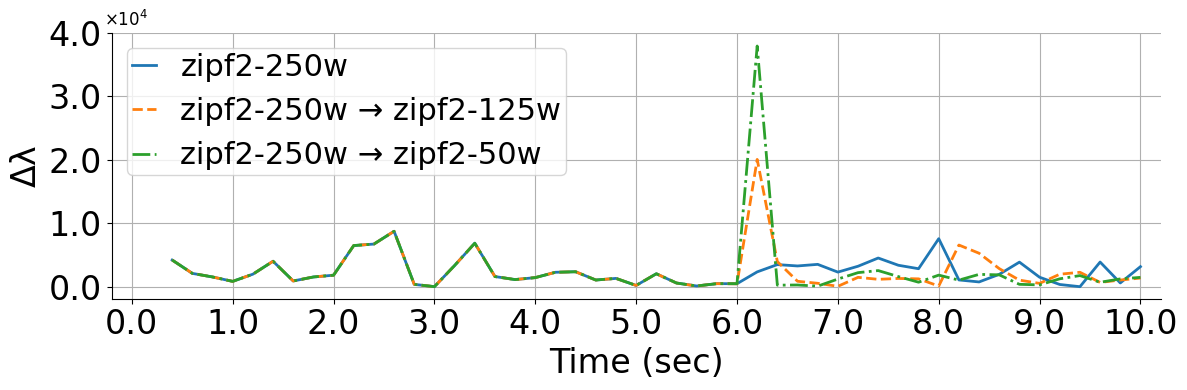

In [41]:
## TFS''
# slides
# plot_multi_tfs_sec_var(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[26,24], lw=3, output='')

# # conference
# plot_multi_tfs_sec_var(datasets=pcap_file[1:2] + pcap_file[80:82], fs=[24,22],output='Conference')
# plot_multi_tfs_sec_var(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[24,22],output='Conference')
# plot_multi_tfs_sec_var(datasets=pcap_file[7:8] + pcap_file[94:96], fs=[24,22],output='Conference')

# thesis
plot_multi_tfs_sec_var(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[24,22],output='Thesis')


---
### Plot Confusion Matrix

In [43]:
def plot_confusion_matrix(cm, type):
    # Confusion matrix values
    # cm = np.array([[50, 10], 
    #                [5, 35]])
    
    acc = round((cm[0][0] + cm[1][1])*100 / (sum(cm[0])+sum(cm[1])), 1)
    pre = round((cm[0][0])* 100 / (sum(cm[0]) ), 1)
    recall = round((cm[0][0])* 100 / (cm[0][0] + cm[1][0]), 1)
    f1score = round(2*(pre*recall) / (pre + recall), 1)
    tnr = round((cm[1][1])* 100 / (cm[0][1] + cm[1][1]), 1)
    
    print(f'Accuracy  = {acc} %')
    print(f'Precision = {pre} %')
    print(f'Recall    = {recall} %')
    print(f'F1Score   = {f1score} %')
    print(f'TNR    = {tnr} %')

    # Class labels
    classes1 = [f'True\n({type} changed)', f'False\n({type} no-changed)']
    classes2 = ['Positive\n(detect)', 'Negative\n(no-detect)']

    # Create the plot
    fig, ax = plt.subplots(figsize=(7,7))
    cax = ax.matshow(cm, interpolation='nearest', cmap='Blues')

    # Add colorbar
    # plt.colorbar(cax, shrink=0.8)

    # Set axis labels
    ax.set_xticklabels([''] + classes1, fontsize=16)
    ax.set_yticklabels([''] + classes2, fontsize=16)

    # Add annotations
    for (i, j), val in np.ndenumerate(cm):
        if (i, j) == (0, 0):
            plt.text(j, i, f'{val}\n(TP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (0, 1):
            plt.text(j, i, f'{val}\n(FP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 0):
            plt.text(j, i, f'{val}\n(FN)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 1):
            plt.text(j, i, f'{val}\n(TN)', ha='center', va='center', color='black', fontsize=30)

    # Customize gridlines and layout
    ax.set_xticks(np.arange(-0.5, len(classes1), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(classes2), 1), minor=True)
    ax.tick_params(which='minor', bottom=False, left=False)

    # Add title
    # plt.title('Confusion Matrix', fontsize=20)

    plt.show()

Accuracy  = 92.0 %
Precision = 90.0 %
Recall    = 100.0 %
F1Score   = 94.7 %
TNR    = 71.4 %


/tmp/ipykernel_1505/4047359107.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes1, fontsize=16)
/tmp/ipykernel_1505/4047359107.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes2, fontsize=16)


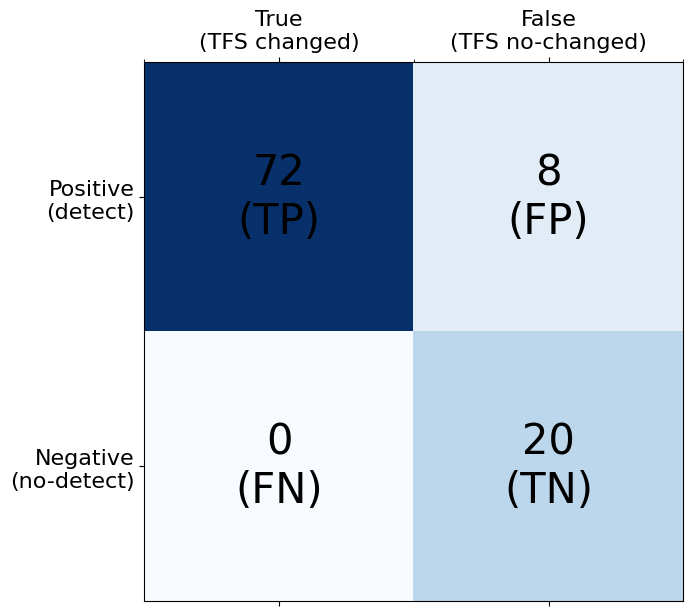

Accuracy  = 52.0 %
Precision = 44.0 %
Recall    = 97.4 %
F1Score   = 60.6 %
TNR    = 24.2 %


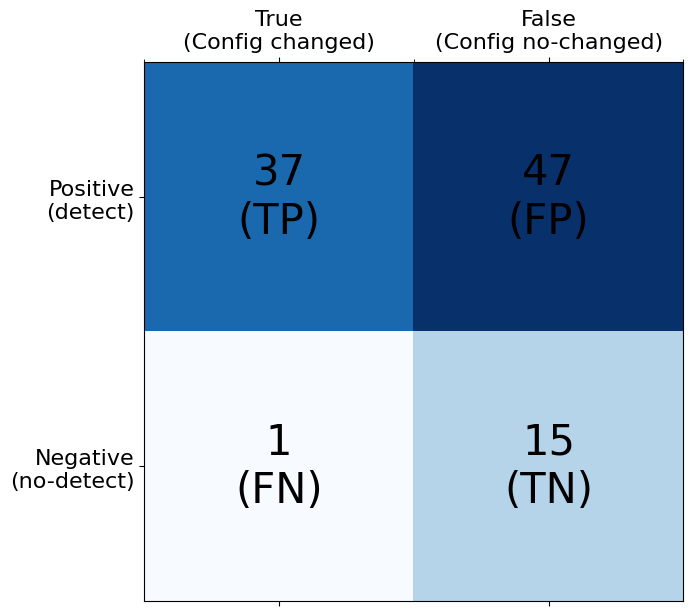

In [44]:
plot_confusion_matrix(cm=[[72, 8], [0, 20]], type="TFS")
plot_confusion_matrix(cm=[[37, 47], [1, 15]], type="Config")